# Introduction to Julia - Part 2

---


## Indexing
We've already seen indexing a few times. Let's review what you have learned already and
look at a few additional tricks and tips.

You can use the keyword `end` to specify the last value in an array. This way you don't need to know exactly how long the array is, nor do you need to use the `length()` or `size()` functions first to get the array's dimension(s).

In [1]:
z = [1,2,3,4,5,6,7,8]
println("z: ", z)
println("first: ", z[1])
println("end: ", z[end])

z: [1, 2, 3, 4, 5, 6, 7, 8]
first: 1
end: 8


You can also extract a *slice* of an array by using the `:` operator.  You put numbers before and after the `:` to specify indices to extract:

In [2]:
println("first three:", z[1:3])
println("4th to end:", z[4:end])

first three:[1, 2, 3]
4th to end:[4, 5, 6, 7, 8]


You can also give a range of indexes using this notation:
`array[start:step:stop]`, where the step part is optional. 

In [3]:
println("every other value: ", z[1:2:8])
println("every 3rd value: ", z[1:3:8])
println("every 3rd value starting from the 2nd value: ", z[2:3:8])

every other value: [1, 3, 5, 7]
every 3rd value: [1, 4, 7]
every 3rd value starting from the 2nd value: [2, 5, 8]


In [4]:
# indexing for 2D arrays:
z2D = [0 1 2 3 ; 4 5 6 7]
println("z2D:")
println(z2D)
println("size(z2D): ",size(z2D))

z2D:
[0 1 2 3; 4 5 6 7]
size(z2D): (2, 4)


In [5]:
println("z2D[0,0]:", z2D[1,1])
println("z2D[-1,-1]:", z2D[end,end])
println("First column:", z2D[:,1])
println("Last column:", z2D[:,end])
println("First row:", z2D[1,:])
println("Last row:", z2D[end,:])
println("First 2 x 2 sub-array: ")
print(z2D[1:2,1:2])

z2D[0,0]:0
z2D[-1,-1]:7
First column:[0, 4]
Last column:[3, 7]
First row:[0, 1, 2, 3]
Last row:[4, 5, 6, 7]
First 2 x 2 sub-array: 
[0 1; 4 5]

In [6]:
# Let's take a look at the notebook's workspace to see what it tells us about ll the variables defined so far:
varinfo()

| name |      size | summary                 |
|:---- | ---------:|:----------------------- |
| Base |           | Module                  |
| Core |           | Module                  |
| Main |           | Module                  |
| z    | 104 bytes | 8-element Vector{Int64} |
| z2D  | 104 bytes | 2×4 Matrix{Int64}       |


 Notice under the summary column that `z` and `z2D` are defined as a *Vector* (i.e. a one dimensional array) and a *Matrix* (i.e. a two-dimensional array), respectively. Thy also have type `Int64`, meaning 64-bit integers.

# Ranges
Sometimes we will want to generate a long list of integers, especially when we are iterating through data or running time steps in a numerical simulation. While you could do this using an array, Julia has a specific function `range()` that is optimized for creating integer lists.  Here are some examples:

In [92]:
r = range(1,10,length=10)
println(r)

1.0:1.0:10.0


In [8]:
r[1]

1.0

In [9]:
r[end]

10.0

You can also generate a range over a specific interval and with specific spacing using the syntax `range(start, stop ,step=step_length)`, where `step_length` is the spacing between values. 
For example:

In [10]:
r2 = range(1,10,step=2)

1:2:9

In [11]:
r2[1]

1

Ranges are also useful for creating arrays of floating point numbers:

In [12]:
s = range(1,10,step=0.5)

1.0:0.5:10.0

In [13]:
reverse = range(99.1,11.,step=-0.01)

99.1:-0.01:11.0

# Array of other variable types

For most of the numerical work in this course we will be using `Float64` arrays for our computations. However, arrays in Julia can also contain other variable types such as `Int64`, `String`, `Bool` and more.

In [14]:
# example array of strings:
string_array = ["yellow", "red", "blue", "green", "black"]
println("string_array: ",string_array)
typeof(string_array)

string_array: ["yellow", "red", "blue", "green", "black"]


Vector{String} (alias for Array{String, 1})

In [15]:
mixed_array = ["string_stuff", 12, 12.2,true]
println("mixed_array: ", mixed_array)
typeof(mixed_array)

mixed_array: Any["string_stuff", 12, 12.2, true]


Vector{Any} (alias for Array{Any, 1})

In [16]:
# boolean (logical) array:
boolean_array = [true,false,true,true,false]
println("boolean_array: ", boolean_array)
typeof(boolean_array)

boolean_array: Bool[1, 0, 1, 1, 0]


Vector{Bool} (alias for Array{Bool, 1})

# Tuples

A tuple is similar to a list in that it is a sequence of Julia variables. However tuples are immutable, meaning once you define a tuple variable, you can not modify its contents like you can for lists or arrays. 

A tuple is created by putting comma separated values in parentheses:

In [17]:
tuple_example = (1.0, 'a',[1,2,3,4,5])
varinfo()

| name          |      size | summary                                                                                        |
|:------------- | ---------:|:---------------------------------------------------------------------------------------------- |
| Base          |           | Module                                                                                         |
| Core          |           | Module                                                                                         |
| Main          |           | Module                                                                                         |
| boolean_array |  45 bytes | 5-element Vector{Bool}                                                                         |
| mixed_array   | 109 bytes | 4-element Vector{Any}                                                                          |
| r             |  48 bytes | 10-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}   |
| r2            |  24 bytes | 5-element StepRange{Int64, Int64}                                                              |
| reverse       |  48 bytes | 8811-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}} |
| s             |  48 bytes | 19-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}   |
| string_array  | 143 bytes | 5-element Vector{String}                                                                       |
| tuple_example | 104 bytes | Tuple{Float64, Char, Vector{Int64}}                                                            |
| z             | 104 bytes | 8-element Vector{Int64}                                                                        |
| z2D           | 104 bytes | 2×4 Matrix{Int64}                                                                              |


In [18]:
# Access tuple elements using square brackets:
tuple_example[1]

1.0

In [19]:
tuple_example[1:end]

(1.0, 'a', [1, 2, 3, 4, 5])

In [20]:
# try to modify the tuple, this will give an error:
tuple_example[1] = "new_value"

LoadError: MethodError: no method matching setindex!(::Tuple{Float64, Char, Vector{Int64}}, ::String, ::Int64)

In [21]:
# now for comparison, modify the first entry in our list z:
z[1] = 42

42

In [22]:
z2d_shape = size(z2D)
println(typeof(z2d_shape))
println(z2d_shape)

Tuple{Int64, Int64}
(2, 4)


# Dictionaries
Another standard Julia variable type is called a dictionary. They are used to store lists of keyword:value pairs. They are really useful for looking up a value when you know the keyword but not the value. We may visit them later on in the course but for now we will skip over them. For further info, see for example: https://docs.julialang.org/en/v1/base/collections/#Dictionaries


# Functions
Functions are blocks of organized code that are highly reusable and provide a level of modularity to a code. They are a great way to create a piece of code that can be used repeatedly, rather than typing the same lines of code over and over again each time you want to calculate a new value.

In [23]:
# simple function example:
"""    
    hello_world()
Get the string: "Hello World"
"""
function hello_world()
    return "Hello World"
end

hello_world

In [24]:
# To call a function, enter its name followed by parentheses:
hello_world()

"Hello World"

In [25]:
# assign the results of function to the variable str:
str = hello_world()
println(str)

Hello World


In [26]:
### Help!

### Help with functions
When you write a function, you can include some help text, referred to as a *docstring* that notes how to use the function. In Julia, this text can be displayed using the syntax `?functionname`. For example, let's get the docstring for the `range()` function:

In [27]:
?range

search: range LinRange UnitRange StepRange StepRangeLen trailing_zeros



```
range(start[, stop]; length, stop, step=1)
```

Given a starting value, construct a range either by length or from `start` to `stop`, optionally with a given step (defaults to 1, a [`UnitRange`](@ref)). One of `length` or `stop` is required.  If `length`, `stop`, and `step` are all specified, they must agree.

If `length` and `stop` are provided and `step` is not, the step size will be computed automatically such that there are `length` linearly spaced elements in the range.

If `step` and `stop` are provided and `length` is not, the overall range length will be computed automatically such that the elements are `step` spaced.

Special care is taken to ensure intermediate values are computed rationally. To avoid this induced overhead, see the [`LinRange`](@ref) constructor.

`stop` may be specified as either a positional or keyword argument.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.


# Examples

```jldoctest
julia> range(1, length=100)
1:100

julia> range(1, stop=100)
1:100

julia> range(1, step=5, length=100)
1:5:496

julia> range(1, step=5, stop=100)
1:5:96

julia> range(1, 10, length=101)
1.0:0.09:10.0

julia> range(1, 100, step=5)
1:5:96
```


In our `hello_world()` function, the text in triple quotes is the docstring. Let's display it:

In [28]:
?hello_world

search: hello_world



```
hello_world()
```

Get the string: "Hello World"


Let's create a more interesting function that will take the square (power 2) of the input arguments to the function:

In [29]:
function compute_x_squared(x)
    y = x.^2  # note the use of the dot here so that IF x is an array, it will square each element in the array
    return y
end

compute_x_squared (generic function with 1 method)

In [30]:
# use function with a single scalar as the input:
compute_x_squared(2)

4

In [31]:
# use function with an array input:
compute_x_squared([1. 2. 4.])

1×3 Matrix{Float64}:
 1.0  4.0  16.0

### Function arugments
The variables in the function definition (i.e. its arguments) are called dummy or generic arguments to the function, since they are just represenative variable names and not the actual variable name you need to feed into the function. In other words, uou don't need to use the same variable name(s) outside the function. 

In [32]:
# For example, let's input the variable u:
u = 9
compute_x_squared(u)

81

In [33]:
# Here's a function with two input arguments:
function compute_x_plus_y(x,y)
    z = x + y
    return z
end

compute_x_plus_y (generic function with 1 method)

In [34]:
compute_x_plus_y(1,2)

3

In [35]:
# Here's a function with a two input arguments and two outputs:
function square_inputs(x,y)
    p = x^2
    q = y^2
    return p,q
end

square_inputs (generic function with 1 method)

In [36]:
a,b = square_inputs(2,3)
println(a)
println(b)

4
9


In [37]:
# Note that if we had instead used a single variable for the function output above it would be a tuple with two elements:
c = square_inputs(2,3)

(4, 9)

In [38]:
# then we could extract them with
a = c[1]
b = c[2];
# but obviously it is better to just assign the variables using the syntax: a,b = square_inputs(2,3)

### Variable scope in functions
Any variable created inside a function (like p and q above) only have scope (i.e. exist) within the function. They do not exist outside the function, so if you try to access them outside the function you will get an error. You can think of a function as a factory where raw materials go inside and some finished product gets shipped out of the function, but all the details of what happens inside the factory are kept hidden inside the function. In this way, functions are useful for keeping your workspace free from the clutter of lots of temporary or working variables.

In [39]:
# check this by trying to access the function variable p: 
p

LoadError: UndefVarError: p not defined

**One of the most important use of functions is for code reuse.**  You can put often used commands (or long sequences of commands) inside a function and then just call the function rather than cutting and pasting the same section of commands several times. This makes your main code (or notebook) much simpler to read and makes it easier to debug code since you have only a single function to debug, rather than multiple instances of it.

# Boolean (logical) variables

In [40]:
 1 > 2

false

In [41]:
1 < 2 

true

In [42]:
status = false
println(status)

false


In [43]:
status = true

true

## Testing for equivalence

In [44]:
1 == 2

false

In [45]:
1 == 1

true

In [46]:
a = 12.3
b = 12.3
a == b

true

In [47]:
# assign to a variable:
c = a == b 

true

# Control Flow
Control Flow statements use logic to control the flow of a program. Here are some examples:

In [48]:
x = 100
if x > 0
    println("Positive Number")
elseif x < 0
    println("Negative Number")
else
    prprintlnint("Zero")
end


Positive Number


In [49]:
# Let's try that in a function now:
function print_sign(x)
    if x > 0
        println("Positive Number")
    elseif x < 0
        println("Negative Number")
    else
        println("Zero")
    end
end

print_sign (generic function with 1 method)

In [50]:
a = -6
print_sign(a)

Negative Number


In [51]:
b = 2.0
print_sign(b)

Positive Number


In [52]:
print_sign(0)

Zero


In [53]:
mood = "tired"

# print text depending on value of "mood":
if mood == "tired"
    println("Drink some coffee!")
elseif mood == "bored"
    println("Go read a book")
elseif mood == "happy"
    println("Enjoy the moment")    
else
    println("Have a nice day!")
end

Drink some coffee!


# For Loops
`for` loops are used to iterate through computations.

In [54]:
# for loop over values in an array:
x = [4,5,0,-1,2]
for i in x
    println(i)
end

4
5
0
-1
2


In [55]:
for i in 0:10
    println(i)
end

0
1
2
3
4
5
6
7
8
9
10


In [56]:
# use range
for i in range(0,50,step=5)
    println(i)
end

0
5
10
15
20
25
30
35
40
45
50


In [57]:
# another very common way to create a for loop over the values in an array:
vals = 0:10
for i = 1:length(vals)
    println(vals[i])
end

0
1
2
3
4
5
6
7
8
9
10


In [58]:
x = 0
for i in 0:5
    x = x + i
    println("i: ",i," x: ",x)
end
print("this statement is outside the for loop")    

i: 0 x: 0
i: 1 x: 1
i: 2 x: 3
i: 3 x: 6
i: 4 x: 10
i: 5 x: 15
this statement is outside the for loop

In [59]:
# You can prematurely exit a for loop using a break command:
x = 0
for i in 0:50000 
    x = x + i
    println("i: ",i," x: ",x)
    if x > 100
        println("breaking out of loop since x > 100")
        break
    end
end

i: 0 x: 0
i: 1 x: 1
i: 2 x: 3
i: 3 x: 6
i: 4 x: 10
i: 5 x: 15
i: 6 x: 21
i: 7 x: 28
i: 8 x: 36
i: 9 x: 45
i: 10 x: 55
i: 11 x: 66
i: 12 x: 78
i: 13 x: 91
i: 14 x: 105
breaking out of loop since x > 100


In [60]:
# iterate over values in a mixed array:
for val in [1, 2.0, true, "a", "bcd", "efgh", "ijklmnop"]
    println("value: ", val)
    println("   typeof(val): ",typeof(val))
end

value: 1
   typeof(val): Int64
value: 2.0
   typeof(val): Float64
value: true
   typeof(val): Bool
value: a
   typeof(val): String
value: bcd
   typeof(val): String
value: efgh
   typeof(val): String
value: ijklmnop
   typeof(val): String


# While loops
`while` loops are similar to `for` loops but they don't stop until a specific logical condition has been met. Here are some examples:

In [61]:
x = 0
while x < 10
    x = x + 1
    println("x: ",x)
end

x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10


In [62]:
# the same loop, but where we replace x = x + 1 with Julia's += operator which does the same thing:
x = 0
while x < 10
    x += 1
    println("x: ",x)
end

x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10


In [63]:
# there are a few of these shortcut operators:  += , -=. , *= , and /=: 
x = 0
x += 1
println(x)

1


In [64]:
x = 0
x -= 1
println(x)

-1


In [65]:
x = 5
x *= 2
println(x)

10


In [66]:
x = 10
x /= 2
println(x)

5.0


Be careful to make sure that `while` statements have a definite end point. For example, the following expression will evaluate forever!  

To stop this from running, select 'interupt' under the Kernel menu above or hit the stop button (the black square button)

In [ ]:
x = 1
while true
    println("To infinity and beyond! x = ",x)
    x += 1
end

# Generating arrays:
Julia has a several functions that are useful for automatically generating arrays of numbers and here we will look at a few of the most commonly used ones. `zeros` generates an array with all zeros and likewise `ones` generates an array filled with ones. The basic syntax is `zeros((shape))` where `shape` is a tuple that specifies the dimensions of the array. For example

In [68]:
c = zeros(3,5)

3×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [69]:
d = ones(2,3)

2×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0

`fill` generates a matrix filled with a specified value. The basic syntax is `full(fill_value,(shape))`

In [70]:
# generate a 3 x 3 array filled with the value pi:
e = fill(pi,3,5)

3×5 Matrix{Irrational{:π}}:
 π  π  π  π  π
 π  π  π  π  π
 π  π  π  π  π

In [71]:
# note you can alternatively specify the array dimension as a tuple:

In [72]:
e = fill(pi,(3,5))

3×5 Matrix{Irrational{:π}}:
 π  π  π  π  π
 π  π  π  π  π
 π  π  π  π  π

In [73]:
mytuple = (5,2)
ones(mytuple)

5×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0

# Array Computations
Here we will work through a simple example that involves computing the value of a function of two variables and making a 2D plot. 

Here is the function:

$f(x,y)= \sin(x)*\cos(0.5*y)$

and we'd like to plot if for $x$ ranging from $-2\pi$ to $2\pi$ and $y$ ranging from $-\pi$ to $\pi$.

To start off, let's make some `linspace` arrays to use for $x$ and $y$:

In [111]:
# x and y values:
x = range(-2*pi, 2*pi, length=100)
y = range(-pi, pi, length=50);

What we'd like to do now is to evaluate $f(x,y)$ over all possible combinations of values of $(x,y)$. Visually, that means evaluating the function at all the grid points in the image below:

<img src="Grid.png" alt="Image Test" style="width:1200px">

There are two main ways that this can be accomplished. First we will look at the *double for-loop* solution.

In this approach, the code has an outer loop over the $y$ variable and then a loop over the value of $x$ is inserted inside the $y$ loop:

In [112]:
m = length(x)
n = length(y)
f = zeros((n,m))  # initialize the array with 0's. This allocates space in the computer memory.
for i in 1:n
    for j in 1:m              
        f[i,j] = sin(x[j])*cos(0.5*y[i])  # assign values for all i and j indexes
    end
end

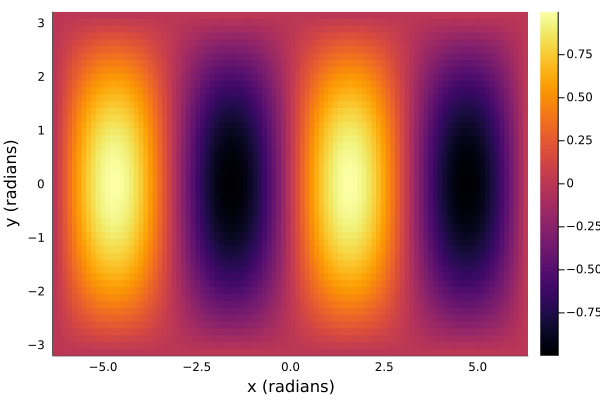

In [113]:
# plot it:        
using Plots
heatmap(x,y,f,
    xlabel="x (radians)",
    ylabel="y (radians)"
)

Now let's look at another way to evaluation the function that requires only a single line of code. Specifically we will use
what is called an *array comprehension*. Specifically, we create a new array (in brackets below) with the iterators over x and y defined inside the array notation along with the function to evaluate. 

In [114]:
fg = [sin(xg)*cos(0.5*yg) for yg in y, xg in x ]

50×100 Matrix{Float64}:
 1.49976e-32  7.75155e-18  1.53784e-17  …  -7.75155e-18  -1.49976e-32
 1.56927e-17  0.00811081   0.0160911       -0.00811081   -1.56927e-17
 3.13209e-17  0.0161883    0.0321161       -0.0161883    -3.13209e-17
 4.68204e-17  0.0241992    0.0480091       -0.0241992    -4.68204e-17
 6.21275e-17  0.0321108    0.0637048       -0.0321108    -6.21275e-17
 7.71793e-17  0.0398903    0.0791388    …  -0.0398903    -7.71793e-17
 9.19139e-17  0.047506     0.0942476       -0.047506     -9.19139e-17
 1.06271e-16  0.0549264    0.108969        -0.0549264    -1.06271e-16
 1.20191e-16  0.0621211    0.123243        -0.0621211    -1.20191e-16
 1.33618e-16  0.0690606    0.13701         -0.0690606    -1.33618e-16
 1.46495e-16  0.0757163    0.150214     …  -0.0757163    -1.46495e-16
 1.5877e-16   0.0820608    0.162801        -0.0820608    -1.5877e-16
 1.70393e-16  0.0880682    0.174719        -0.0880682    -1.70393e-16
 ⋮                                      ⋱                
 1.5877e-

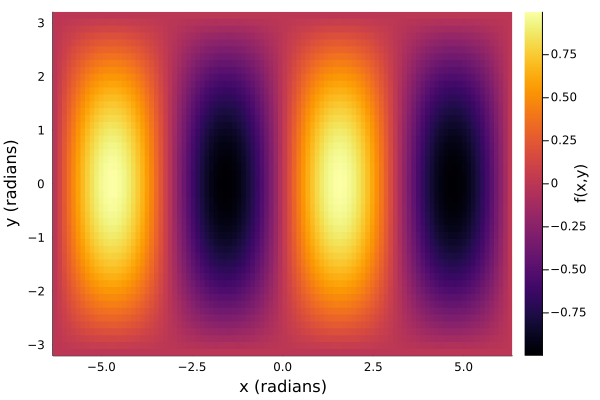

In [115]:
# plot it:        
heatmap(x,y,fg,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  # new command, adds colorbar label
)

As you can see, the array comprehension method is much more concise than the explicit double for-loop method we first used to evaluation the function. 

# Additional 2D Plotting Commands:

 In the above examples, we plotted the 2D gridded surface using the `heatmap` plotting function, which uses a continuous spectrum of colors for each grid point. If you want more discrete color intervals, you can instead used the `contour` function, which makes  contour plots.
 
The general syntax is `contour(x,y,z)`.

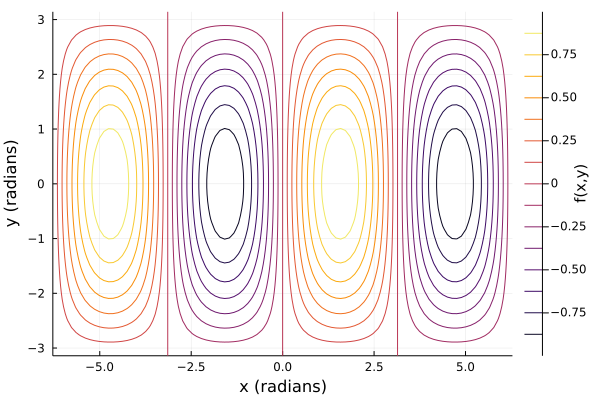

In [116]:
contour(x,y,f,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  
)

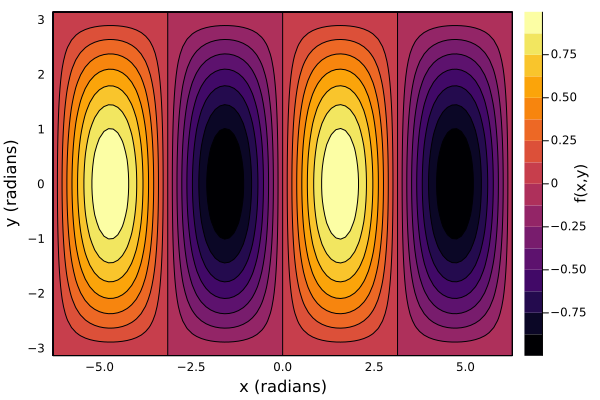

In [117]:
# Contour plot with filled contours using the `fill=true` argument:
contour(x,y,f,fill=true,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  
)

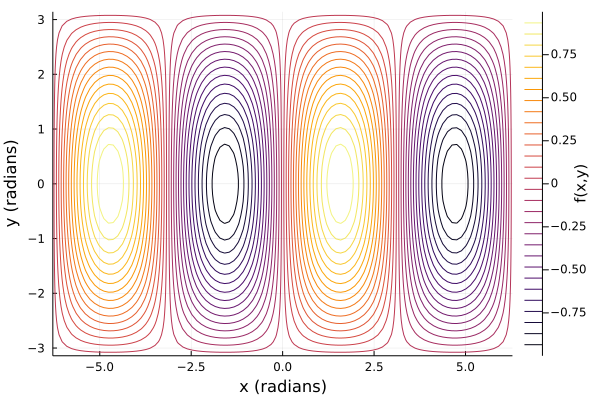

In [118]:
# You can set the number of contours using the argument `levels=number_of_levels`
# and it will create number_of_levels contours. This example sets it to draw 30 contours:
contour(x,y,f,levels=30,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  
)

Also, you can adjust the colorscale limits using the `clim()` function:

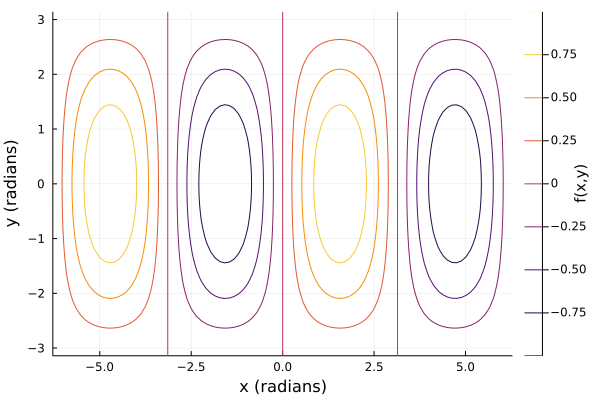

In [119]:
# Alternatively, you can explicitly specify the contour levels using `levels=[array of contour levels]`
levs = -1:.25:1  # here we use a range to define the contour levels, then we use `levs` as an argument to the contour() function
contour(x,y,f,levels=levs,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  
)

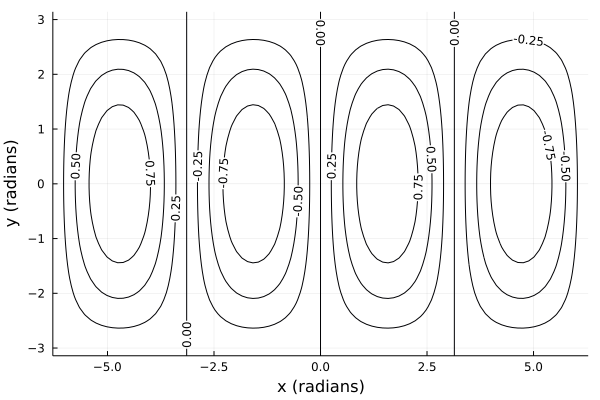

In [120]:
# Contour plot with plain labelled contours
contour(x,y,f,levels=levs,
    xlabel="x (radians)",
    ylabel="y (radians)",
    contour_labels = true,
    colorbar=false
)

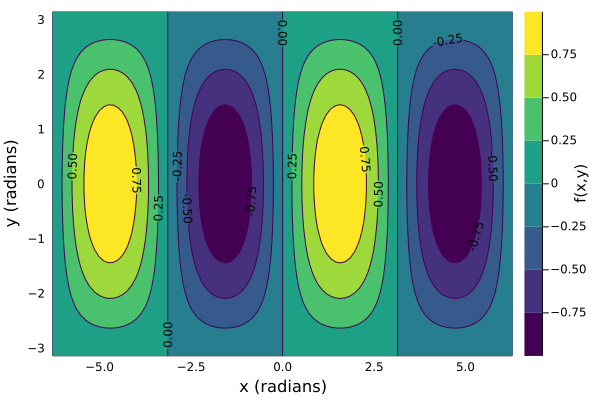

In [121]:
# Contour plot with plain labelled contours
contour(x,y,f,levels=levs,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)" , 
    fill=true,
    contour_labels = true,
    colorbar=true,
    c=:viridis     # use different colormap
)


# Array Logicals:
Logical arrays are helpful for including certain values from arrays. For example, suppose we have the array:

In [122]:
vals =[-1 2 -10 1; 1 2 3 -2]
print(vals)

[-1 2 -10 1; 1 2 3 -2]

In [123]:
b_negative = vals .< 0   
# note the use of the . here to specify the element by element use of the < operator on the elements in `vals`

2×4 BitMatrix:
 1  0  1  0
 0  0  0  1

In [124]:
# Extract only the negative values:
vals[b_negative]

3-element Vector{Int64}:
  -1
 -10
  -2

In [125]:
# Take a sum of the negative values:  
sum(vals[b_negative])

-13

# Gridding Unevenly Spaced Data Onto an Evenly Spaced Grid:

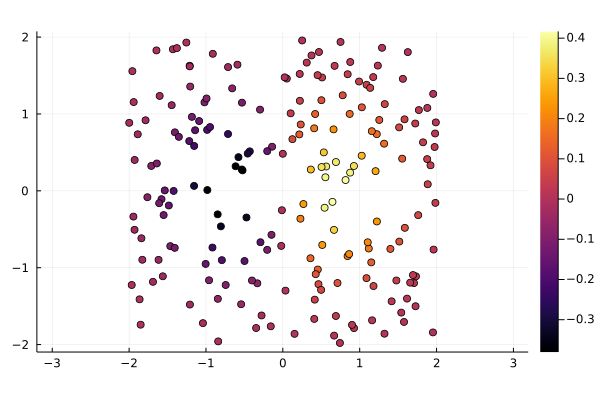

In [126]:
using Plots 

npts = 200 
x = 4*rand(npts) .- 2  # this generates npts random, uniformly distributed numbers on the range -2 to +2
y = 4*rand(npts) .- 2 

 # evaluate a 2D function using the random data:
z = x.*exp.(-x.^2 - y.^2) # note the use of the . before each operator, as required for element by element array operation

# plot them:
scatter(x,y,zcolor = z,
    label=nothing,
    aspect_ratio=:equal   # new command: sets equal aspect ratio for x and y plot axes
    )   

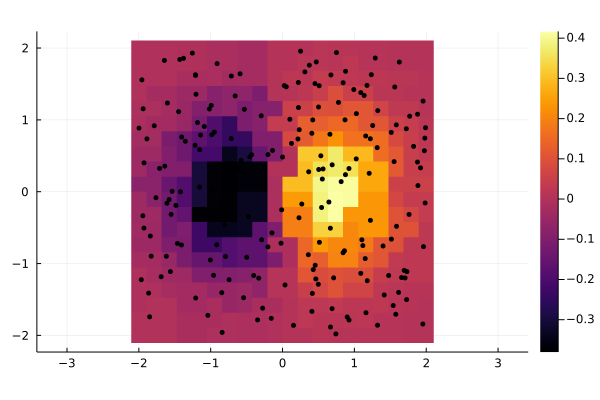

In [127]:
# Contour unevenly sampled data:

# import Pkg; Pkg.add("ScatteredInterpolation") # uncomment this line to install the package if it's not already insalled
using ScatteredInterpolation   

# form interpolation function using the points [x,y] and their values z:
itp = interpolate(NearestNeighbor(), [x y]', z) 

# note the use of the tranpose operator ' above, which swaps the rows and columns in the array
# since interpolate expects a 2 x n array of points 

# Make an even grid for interpolating the scattered data:
n = 20 # number of grid points

xg = range(-2,2,length=n)
yg = range(-2,2,length=n)

X = repeat(xg, n)[:]
Y = repeat(yg', n)[:]
gridPoints = [X Y]'   # note the use of the tranpose operator ' here, which swaps the rows and columns in the array

# Evaluate interpolation function at grid points:
interpolated = evaluate(itp,gridPoints)

# reshape one-dimensional interpolated array into 2D matrix:
gridded = reshape(interpolated, n, n)

# Plot:
heatmap(xg,yg,gridded',aspect_ratio=:equal)  # note the use of the transpose operator here, otherwise the matrix plots incorrectly

# add some dots showing the origional unevenly sampled data poitns:
scatter!(x,y,label=nothing, markershape = :circle, markersize = 3,markercolor=:black)


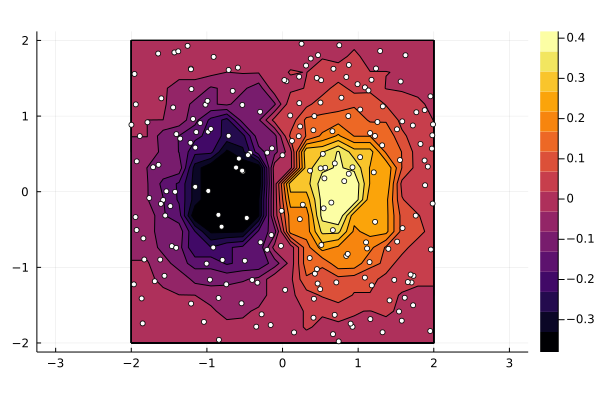

In [128]:
# different version using contours:
# Plot:
contour(xg,yg,gridded',
    aspect_ratio=:equal,
    fill=true
    )  # note the use of the transpose operator here, otherwise the matrix plots incorrectly

# add some dots showing the origional unevenly sampled data poitns:
scatter!(x,y,label=nothing, markershape = :circle, markersize = 3,markercolor=:white)

